In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

#plt.gray()

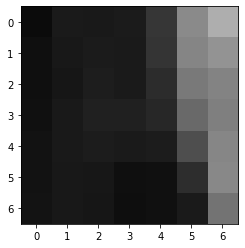

In [2]:
nose_left = cv2.imread("nose_left.png")
nose_right = cv2.imread("nose_right.png")

#img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
#gray_left = cv2.cvtColor(img_left, cv2.COLOR_RGB2GRAY)

plt.imshow(nose_left)
plt.imshow(nose_right)

In [3]:
def sumdiff(img1, img2):
    img1 = img1[...,0]
    img2 = img2[...,0]
    diff = np.absolute(np.subtract(img2, img1, dtype=np.float32))
    return diff.sum()
    
print(sumdiff(nose_left, nose_right))
print(sumdiff(np.zeros(3), np.zeros(3)))

7657.0
0.0


In [4]:
nose1 = cv2.imread("nose1.png")
nose2 = cv2.imread("nose2.png")
nose3 = cv2.imread("nose3.png")

print(sumdiff(nose_left, nose1))
print(sumdiff(nose_left, nose2))
print(sumdiff(nose_left, nose3))

1361.0
119.0
1490.0


In [5]:
nose_span = cv2.imread("nose_span.png")

def findposition(row, img):
    img_rows, img_cols, __ = img.shape
    row_rows, row_cols, __ = row.shape
    results = []
    for i in range(row_cols-img_cols+1):
        tmp = row[:, i:i+img_cols]
        #print(tmp.shape)
        results.append(sumdiff(tmp, img))
    return results.index(min(results)), min(results)

print(findposition(nose_span, nose_left))

(132, 119.0)


In [6]:
tsukuba_left = cv2.imread("tsukuba_left.png")
tsukuba_right = cv2.imread("tsukuba_right.png")

tsukuba_left_gray = cv2.cvtColor(tsukuba_left, cv2.COLOR_BGR2RGB)
tsukuba_left_gray = cv2.cvtColor(tsukuba_left_gray, cv2.COLOR_RGB2GRAY)

tsukuba_left_gray_3 = np.zeros_like(tsukuba_left)
tsukuba_left_gray_3[:,:,0] = tsukuba_left_gray
tsukuba_left_gray_3[:,:,1] = tsukuba_left_gray
tsukuba_left_gray_3[:,:,2] = tsukuba_left_gray


tsukuba_right_gray = cv2.cvtColor(tsukuba_right, cv2.COLOR_BGR2RGB)
tsukuba_right_gray = cv2.cvtColor(tsukuba_right_gray, cv2.COLOR_RGB2GRAY)

tsukuba_right_gray_3 = np.zeros_like(tsukuba_right)
tsukuba_right_gray_3[:,:,0] = tsukuba_right_gray
tsukuba_right_gray_3[:,:,1] = tsukuba_right_gray
tsukuba_right_gray_3[:,:,2] = tsukuba_right_gray    

In [7]:

def templatematching(img, template, windows_size=7): #template = tsukuba_left, img = tsukuba_right
    img_rows, img_cols, __ = img.shape
    template_rows, template_cols, __ = template.shape
    results = []
    for i in range(img_rows):
        print("row:", i)
        row_results = []
        for j in range(img_cols):
            row = img[i:i+windows_size, :]
            block = template[i:i+windows_size, j:j+windows_size]
            idx, value = findposition(row, block)
            row_results.append(value)
        results.append(row_results)
    return results



result_image = templatematching(tsukuba_right_gray_3, tsukuba_left_gray_3)

row: 0
row: 1
row: 2
row: 3
row: 4
row: 5
row: 6
row: 7
row: 8
row: 9
row: 10
row: 11
row: 12
row: 13
row: 14
row: 15
row: 16
row: 17
row: 18
row: 19
row: 20
row: 21
row: 22
row: 23
row: 24
row: 25
row: 26
row: 27
row: 28
row: 29
row: 30
row: 31
row: 32
row: 33
row: 34
row: 35
row: 36
row: 37
row: 38
row: 39
row: 40
row: 41
row: 42
row: 43
row: 44
row: 45
row: 46
row: 47
row: 48
row: 49
row: 50
row: 51
row: 52
row: 53
row: 54
row: 55
row: 56
row: 57
row: 58
row: 59
row: 60
row: 61
row: 62
row: 63
row: 64
row: 65
row: 66
row: 67
row: 68
row: 69
row: 70
row: 71
row: 72
row: 73
row: 74
row: 75
row: 76
row: 77
row: 78
row: 79
row: 80
row: 81
row: 82
row: 83
row: 84
row: 85
row: 86
row: 87
row: 88
row: 89
row: 90
row: 91
row: 92
row: 93
row: 94
row: 95
row: 96
row: 97
row: 98
row: 99
row: 100
row: 101
row: 102
row: 103
row: 104
row: 105
row: 106
row: 107
row: 108
row: 109
row: 110
row: 111
row: 112
row: 113
row: 114
row: 115
row: 116
row: 117
row: 118
row: 119
row: 120
row: 121
row: 122
row

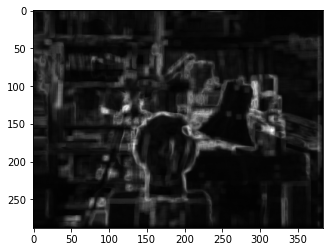

In [9]:
disparity_img = np.array(result_image)
plt.imshow(disparity_img, cmap='gray')